In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=650b800a6f4310e332dc5228b1492c28


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 45.14,
  'feels_like': 37.58,
  'temp_min': 39.81,
  'temp_max': 49.75,
  'pressure': 1015,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 18.41, 'deg': 300, 'gust': 27.63},
 'clouds': {'all': 40},
 'dt': 1644711871,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1644666298,
  'sunset': 1644703929},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data = city_weather.json()

In [11]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 49.75 52 40 18.41


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | kolimvari
City not found. Skipping...
Processing Record 2 of Set 12 | jamestown
Processing Record 3 of Set 12 | butaritari
Processing Record 4 of Set 12 | kapaa
Processing Record 5 of Set 12 | chimbarongo
Processing Record 6 of Set 12 | mandurah
Processing Record 7 of Set 12 | necochea
Processing Record 8 of Set 12 | itarema
Processing Record 9 of Set 12 | ponta do sol
Processing Record 10 of Set 12 | korla
Processing Record 11 of Set 12 | faanui
Processing Record 12 of Set 12 | atambua
Processing Record 13 of Set 12 | barrow
Processing Record 14 of Set 12 | gangapur
Processing Record 15 of Set 12 | bambous virieux
Processing Record 16 of Set 12 | quepos
Processing Record 17 of Set 12 | rikitea
Processing Record 18 of Set 12 | vao
Processing Record 19 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 12 | hobart
Processing Record 21 of Set 12 | leningradskiy
Proces

Processing Record 31 of Set 15 | joshimath
Processing Record 32 of Set 15 | darhan
Processing Record 33 of Set 15 | port hedland
Processing Record 34 of Set 15 | praia
Processing Record 35 of Set 15 | cody
Processing Record 36 of Set 15 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 15 | suntar
Processing Record 38 of Set 15 | half moon bay
Processing Record 39 of Set 15 | xuddur
Processing Record 40 of Set 15 | namibe
Processing Record 41 of Set 15 | mahadday weyne
City not found. Skipping...
Processing Record 42 of Set 15 | vryburg
Processing Record 43 of Set 15 | innisfail
Processing Record 44 of Set 15 | adrar
Processing Record 45 of Set 15 | honiara
Processing Record 46 of Set 15 | sao joao da barra
Processing Record 47 of Set 15 | bandarbeyla
Processing Record 48 of Set 15 | borogontsy
Processing Record 49 of Set 15 | nabire
Processing Record 50 of Set 15 | shache
Processing Record 1 of Set 16 | vredendal
Processing Record 2 of Set 16 | san rafael
Process

Processing Record 15 of Set 19 | san quintin
Processing Record 16 of Set 19 | yirol
City not found. Skipping...
Processing Record 17 of Set 19 | buta
Processing Record 18 of Set 19 | oranjemund
Processing Record 19 of Set 19 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 19 | dunda
Processing Record 21 of Set 19 | meulaboh
Processing Record 22 of Set 19 | virginia beach
Processing Record 23 of Set 19 | turukhansk
Processing Record 24 of Set 19 | old town
Processing Record 25 of Set 19 | praia da vitoria
Processing Record 26 of Set 19 | port augusta
Processing Record 27 of Set 19 | gardan diwal
City not found. Skipping...
Processing Record 28 of Set 19 | rio gallegos
Processing Record 29 of Set 19 | kalmunai
Processing Record 30 of Set 19 | czluchow
Processing Record 31 of Set 19 | machico
Processing Record 32 of Set 19 | mount forest
Processing Record 33 of Set 19 | lucea
Processing Record 34 of Set 19 | inuvik
Processing Record 35 of Set 19 | swan river
Process

Processing Record 45 of Set 22 | grindavik
Processing Record 46 of Set 22 | caraballeda
Processing Record 47 of Set 22 | ondjiva
Processing Record 48 of Set 22 | tokur
Processing Record 49 of Set 22 | ambatofinandrahana
Processing Record 50 of Set 22 | forestville
Processing Record 1 of Set 23 | vysokogornyy
Processing Record 2 of Set 23 | tabas
Processing Record 3 of Set 23 | hofn
Processing Record 4 of Set 23 | moses lake
Processing Record 5 of Set 23 | dumai
Processing Record 6 of Set 23 | viligili
City not found. Skipping...
Processing Record 7 of Set 23 | kolpashevo
Processing Record 8 of Set 23 | opuwo
Processing Record 9 of Set 23 | maloshuyka
City not found. Skipping...
Processing Record 10 of Set 23 | invermere
Processing Record 11 of Set 23 | butterworth
Processing Record 12 of Set 23 | tursunzoda
Processing Record 13 of Set 23 | dunedin
Processing Record 14 of Set 23 | bayaguana
Processing Record 15 of Set 23 | fukue
Processing Record 16 of Set 23 | brae
Processing Record 17

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,20.30,79,100,10.36,US,2022-02-13 00:31:11
1,Butaritari,3.0707,172.7902,83.08,70,100,14.05,KI,2022-02-13 00:33:23
2,Kapaa,22.0752,-159.3190,80.19,66,75,12.66,US,2022-02-13 00:33:23
3,Chimbarongo,-34.7000,-71.0500,67.37,42,0,3.38,CL,2022-02-13 00:33:24
4,Mandurah,-32.5500,115.7000,76.15,53,0,10.29,AU,2022-02-13 00:33:24
5,Necochea,-38.5473,-58.7368,57.04,66,0,1.61,AR,2022-02-13 00:33:24
6,Itarema,-2.9248,-39.9167,78.73,83,52,9.55,BR,2022-02-13 00:33:25
7,Ponta Do Sol,32.6667,-17.1000,63.23,70,0,4.45,PT,2022-02-13 00:33:25
8,Korla,41.7597,86.1469,26.71,48,92,3.13,CN,2022-02-13 00:33:26
9,Faanui,-16.4833,-151.7500,80.44,75,82,9.71,PF,2022-02-13 00:33:26


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-02-13 00:31:11,42.0970,-79.2353,20.30,79,100,10.36
1,Butaritari,KI,2022-02-13 00:33:23,3.0707,172.7902,83.08,70,100,14.05
2,Kapaa,US,2022-02-13 00:33:23,22.0752,-159.3190,80.19,66,75,12.66
3,Chimbarongo,CL,2022-02-13 00:33:24,-34.7000,-71.0500,67.37,42,0,3.38
4,Mandurah,AU,2022-02-13 00:33:24,-32.5500,115.7000,76.15,53,0,10.29
...,...,...,...,...,...,...,...,...,...
527,Grand Gaube,MU,2022-02-13 00:37:05,-20.0064,57.6608,77.40,88,14,4.00
528,Jaranwala,PK,2022-02-13 00:37:06,31.3333,73.4333,47.43,61,0,6.20
529,Claresholm,CA,2022-02-13 00:37:06,50.0333,-113.5852,47.44,29,59,11.50
530,La Seyne-Sur-Mer,FR,2022-02-13 00:37:06,43.0982,5.8847,50.94,59,100,4.00


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

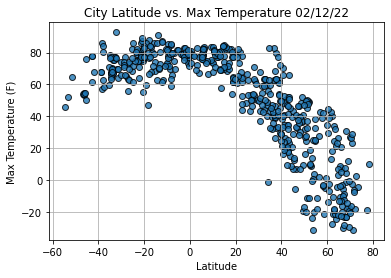

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

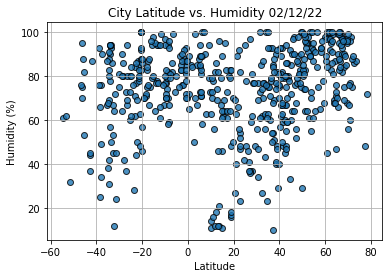

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

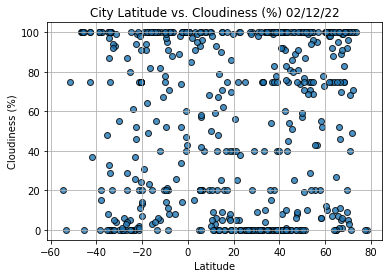

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

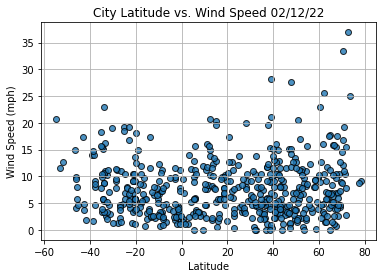

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()